### Decision Tree and Random Forest Classification Problem

In [54]:
import pandas as pd
import numpy as np

In [ ]:
file_path = 'diabetes_dataset.csv'

### About Dataset
The provided dataset appears to be related to diabetes and contains various biomedical measurements and patient characteristics. Here's a detailed description of the dataset columns:

ID: A unique identifier for each record in the dataset.

No_Pation: Another identifier for the patient. It might be a patient number or record ID.

Gender: The gender of the patient (F for Female, M for Male).

AGE: The age of the patient in years.

Urea: Urea level in the blood (likely measured in mg/dL or mmol/L). Urea is a waste product of protein metabolism and can indicate kidney function.

Cr: Creatinine level in the blood (likely measured in mg/dL or µmol/L). Creatinine is another waste product that indicates kidney function.

HbA1c: Glycated hemoglobin, a measure of average blood sugar levels over the past 2-3 months (expressed as a percentage).

Chol: Cholesterol level in the blood (likely measured in mg/dL or mmol/L). This typically refers to total cholesterol.

TG: Triglycerides level in the blood (likely measured in mg/dL or mmol/L). Triglycerides are a type of fat in the blood.

HDL: High-density lipoprotein cholesterol level (often called "good" cholesterol, measured in mg/dL or mmol/L).

LDL: Low-density lipoprotein cholesterol level (often called "bad" cholesterol, measured in mg/dL or mmol/L).

VLDL: Very low-density lipoprotein cholesterol level (measured in mg/dL or mmol/L).

BMI: Body Mass Index, a measure of body fat based on height and weight (calculated as weight in kilograms divided by height in meters squared).

CLASS: The class label indicating the diabetes status of the patient. The possible values seem to be:

N: Non-diabetic

P: Prediabetic

Y: Diabetic

In [56]:
data = pd.read_csv(file_path)
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Since No_Pation is not adding any information, we will drop it.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [58]:
data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


Age of the people considered is >20 and maximum is 79. Adults have been considered. Avg age is ~54.

Cholesterol is zero in some patients.

BMI indicates that there are some people having obesity and some are thin.

/var/folders/37/_10lx23j5bz88ltdjgqzqwm80000gn/T/ipykernel_96937/1743138863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
/var/folders/37/_10lx23j5bz88ltdjgqzqwm80000gn/T/ipykernel_96937/1743138863.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


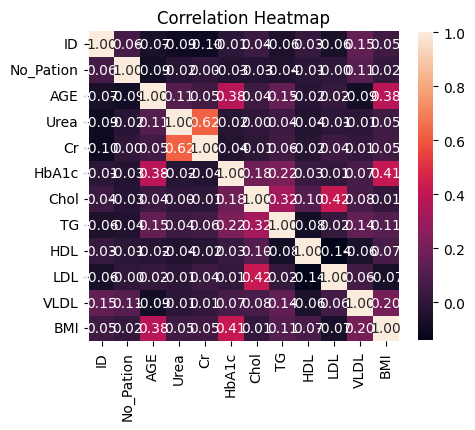

In [59]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [60]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['Gender', 'CLASS'], dtype='object')

In [61]:
unique_values = {col: data[col].unique() for col in cat_cols}
unique_values

{'Gender': array(['F', 'M', 'f'], dtype=object),
 'CLASS': array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)}

In [62]:
data['Gender'] = data['Gender'].replace('f', 'F')
data['CLASS'] = data['CLASS'].replace({'N ': 'N', 'Y ': 'Y', 'P': 'Y'})

In [63]:
unique_values = {col: data[col].unique() for col in cat_cols}
unique_values

{'Gender': array(['F', 'M'], dtype=object),
 'CLASS': array(['N', 'Y'], dtype=object)}

In [64]:
data = pd.get_dummies(data, columns=['Gender', 'CLASS'], drop_first=True)
data = data.drop(columns=['No_Pation'])
data = data.rename(columns={"Gender_M": "Gender", "CLASS_Y": "Class"})
data.head()

,ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,Class
0,502,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
1,735,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0
2,420,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
3,680,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
4,504,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1,0


In [65]:
X = data.drop(columns=['Class', 'ID'])
y = data['Class']

In [66]:
#splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

F1 Score: 0.98
Precision: 0.98
Recall: 0.98
Accuracy of the Decision Tree Classifier: 0.98


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Print the evaluation metrics
print(f"F1 Score (Random Forest): {f1_rf:.2f}")
print(f"Precision (Random Forest): {precision_rf:.2f}")
print(f"Recall (Random Forest): {recall_rf:.2f}")
print(f"Accuracy of the Random Forest Classifier: {accuracy_rf:.2f}")

F1 Score (Random Forest): 0.98
Precision (Random Forest): 0.98
Recall (Random Forest): 0.98
Accuracy of the Random Forest Classifier: 0.98
